In [1]:
from aicsimageio import AICSImage, imread
from aicsimageio.writers import PngWriter
from pathlib import Path
import napari
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### CZI file visualisation

In [2]:
%gui qt

In [3]:
ext = 'czi'
folder = '../../../datasets/microscopy_luke/20180412/day5 PKCzT410E+PWPI-mCherry/'

In [4]:
def get_paths(dir_path, ext):
    return [str(path) for path in Path(dir_path).rglob('*.{}'.format(ext))]

In [5]:
files = get_paths(folder, ext)

In [6]:
len(files)

59

In [7]:
img = AICSImage(files[5])

In [8]:
img.shape

/home/victor/anaconda3/envs/sr/lib/python3.7/site-packages/aicsimageio/transforms.py:178: UserWarning: Data has dimension B with depth 1, assuming B=0 is the desired value, if not the case specify B=x where x is an integer, list, tuple, range, or slice.
  f"Data has dimension {dim} with depth {data.shape[dim_index]}, "
/home/victor/anaconda3/envs/sr/lib/python3.7/site-packages/aicsimageio/transforms.py:178: UserWarning: Data has dimension V with depth 1, assuming V=0 is the desired value, if not the case specify V=x where x is an integer, list, tuple, range, or slice.
  f"Data has dimension {dim} with depth {data.shape[dim_index]}, "


(1, 1, 5, 1, 1024, 1024)

In [9]:
img = img.get_image_data("CZYX", S=0, T=0)

/home/victor/anaconda3/envs/sr/lib/python3.7/site-packages/aicsimageio/transforms.py:178: UserWarning: Data has dimension B with depth 1, assuming B=0 is the desired value, if not the case specify B=x where x is an integer, list, tuple, range, or slice.
  f"Data has dimension {dim} with depth {data.shape[dim_index]}, "
/home/victor/anaconda3/envs/sr/lib/python3.7/site-packages/aicsimageio/transforms.py:178: UserWarning: Data has dimension V with depth 1, assuming V=0 is the desired value, if not the case specify V=x where x is an integer, list, tuple, range, or slice.
  f"Data has dimension {dim} with depth {data.shape[dim_index]}, "


In [10]:
viewer = napari.view_image(img)

### TIFF file visualisation

In [19]:
ext_tiff = 'tif'
folder_tiff = '../../datasets/microscopy_luke/20180620/analyze images/control'

In [20]:
tiff_files = get_paths(folder_tiff, ext_tiff)

In [21]:
len(tiff_files)

57

In [22]:
img = AICSImage(tiff_files[5])

In [23]:
img.shape

(1, 1, 2, 1, 1024, 1024)

In [24]:
img = img.get_image_data("CZYX", S=0, T=0)

In [25]:
viewer = napari.view_image(img)

In [17]:
img.shape

(2, 1, 1024, 1024)

In [73]:
img = img.squeeze(1)

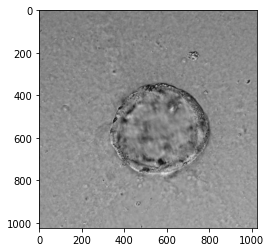

In [75]:
plt.figure()
plt.imshow(img[1], cmap='gray')

In [76]:
img.shape

(2, 1024, 1024)

In [78]:
img = np.asarray(img[1])

In [79]:
img.shape

(1024, 1024)

### Bicubic downsample

In [21]:
import torch
from torch.nn import functional as F
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image

In [98]:
trans = transforms.ToTensor()
img_tsr = trans(img)
img_tsr = img_tsr.unsqueeze(0)
img_tsr.shape

torch.Size([1, 1, 1024, 1024])

In [99]:
bic_img = F.interpolate(img_tsr, scale_factor=0.125, mode='bicubic')

/home/victor/anaconda3/envs/sr/lib/python3.7/site-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bicubic is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))
/home/victor/anaconda3/envs/sr/lib/python3.7/site-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


In [100]:
bic_img.shape

torch.Size([1, 1, 128, 128])

In [101]:
np_img = bic_img.squeeze(0).squeeze(0).numpy()

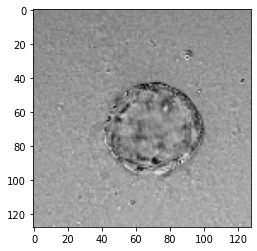

In [102]:
plt.figure()
plt.imshow(np_img, cmap='gray')

In [103]:
# build false rgb
img_rgb = np.stack([np_img, np_img, np_img], 2)
img_rgb.shape

(128, 128, 3)

In [104]:
img_rgb = to_pil_image(trans(img_rgb))

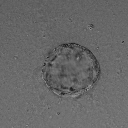

In [105]:
img_rgb

In [106]:
img_rgb.save('16x_micro.png')